In [1]:
import tensorflow as tf

In [2]:
# Importing the required libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
Image_size = [224,224] #Resizing the images to 224X224 

train_path = 'Malaria_small_dataset/Train'
val_path = 'Malaria_small_dataset/Test'

In [4]:
vgg19 = VGG19(input_shape = Image_size +[3],
              include_top=False,
              weights='imagenet')

80142336/80134624 [==============================] - 93s 1us/step


In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# For not training existing weights

for layer in vgg19.layers:
      layer.trainable = False

In [9]:
# To see number of output classes
train_folders = glob('Malaria_small_dataset/Train/*')
print(train_folders)

['Malaria_small_dataset/Train\\Parasite', 'Malaria_small_dataset/Train\\Uninfected']


We have two output classes :
1. Uninfected
2. Parasite

In [10]:
#Adding the our fully connected dense layers

x = Flatten()(vgg19.output)  #Flatten layer 
hidden_layer1 = Dense(64, activation='relu')(x)  # first fully connected dense layer
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)  # second fully connected dense layer
prediction = Dense(1, activation='sigmoid')(hidden_layer2)

model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size = 32,
                                                 class_mode ='binary')

Found 416 images belonging to 2 classes.


In [18]:
validation_set = val_datagen.flow_from_directory(val_path,
                                                 target_size=(224, 224),
                                                 batch_size = 32,
                                                 class_mode ='binary')

Found 134 images belonging to 2 classes.


In [ ]:
#Fitting the model

history = model.fit(
    training_set,
    validation_data = validation_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps=len(validation_set)
) 

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 0.7694 - accuracy: 0.5865 

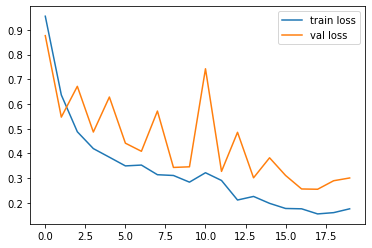

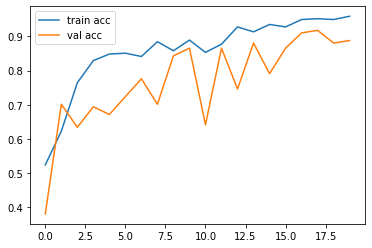

<Figure size 432x288 with 0 Axes>

In [140]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [141]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [142]:
y_pred = model.predict(validation_set)

In [143]:
print(y_pred)

[[9.56913173e-01]
 [7.92191505e-01]
 [8.74431372e-01]
 [9.00478959e-01]
 [9.23833176e-02]
 [2.38436889e-02]
 [1.47646710e-01]
 [2.50768978e-02]
 [7.95467973e-01]
 [3.67310931e-05]
 [4.76554632e-01]
 [4.12492186e-01]
 [4.88251355e-03]
 [6.58935428e-01]
 [1.79202447e-03]
 [9.61637914e-01]
 [9.38151360e-01]
 [9.52168226e-01]
 [4.63783801e-01]
 [3.17784011e-01]
 [4.42281693e-01]
 [6.76910277e-04]
 [4.61839139e-01]
 [1.29456386e-01]
 [1.15161821e-01]
 [5.07077396e-01]
 [7.45691299e-01]
 [7.39802024e-04]
 [8.31253171e-01]
 [7.23610342e-01]
 [4.14294243e-01]
 [2.69076049e-01]
 [2.51772523e-01]
 [5.34503199e-02]
 [9.76878405e-02]
 [9.39913213e-01]
 [4.27528918e-02]
 [8.69519711e-01]
 [1.03994180e-02]
 [1.11955893e-03]
 [2.88625322e-02]
 [7.32989796e-03]
 [2.27921885e-02]
 [8.33676636e-01]
 [9.62409317e-01]
 [2.94089373e-02]
 [7.87105819e-04]
 [8.84641826e-01]
 [7.43096590e-01]
 [3.84530127e-01]
 [3.06973811e-02]
 [1.15815587e-02]
 [4.76149529e-01]
 [6.97285752e-04]
 [9.09486592e-01]
 [9.449598

Testing a single image

In [168]:
img1=image.load_img('/content/C33P1thinF_IMG_20150619_114756a_cell_180.png',target_size=(224,224))
x=image.img_to_array(img1)
x=x/255  #Resizing
x=np.expand_dims(x,axis=0)
model.predict(x)
if model.predict(x) > 0.5:
  print('uninfected')
else:
  print('infected')

infected
